In [1]:
#from customplot import *

#import sqlite3
%autosave 0
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

Autosave disabled


In [2]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
#Setando configurações de visualização
pd.options.display.max_rows=350
pd.options.display.max_columns=60

In [4]:
df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)

In [5]:
df

,AREA,POÇO,ID_INTERVALO,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14,Perda30,PerdaAPI,PerdaPS,PERDA_MAX
1,C1,C1P1,A1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,100.00
2,C1,C1P1,A2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,12.00
3,C1,C1P1,A3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,10.00
4,C1,C1P1,B1,0.13,0.92,1000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0.00
5,C1,C1P2,A1,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,999.00
7,C1,C1P2,A3,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,500.00
8,C1,C1P2,B1,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,450.00
9,C1,C1P3,A1,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,120.00
11,C1,C1P3,A3,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,0,60.00
12,C1,C1P3,B1,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,300.00


In [6]:
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14',
       'Perda30', 'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [7]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [8]:
X

,ATRIB_MED1,ATRIB_MAX1,ATRIB_DIST1,DIFP,MGP1,MGP2,MGP3,MGP4,MGP5,MGP6,MGP7,MGP8,MGP9,MGP10,MGP11,MGP12,MGP13,MGP14
1,0.08,0.54,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0
2,0.05,0.05,1000.00,0.5400,1,1,1,1,0,0,0,1,1,1,0,0,0,0
3,0.05,0.05,1000.00,0.6100,1,1,1,1,0,0,0,1,1,1,0,0,0,0
4,0.13,0.92,1000.00,0.6300,1,1,1,1,0,0,0,1,1,1,0,0,0,0
5,0.16,0.83,300.00,0.4200,1,1,1,1,1,1,0,1,1,1,1,1,1,1
7,0.46,0.95,17.00,0.6040,1,1,1,1,1,1,0,1,1,1,1,1,1,1
8,0.12,0.84,127.00,0.6950,1,1,1,1,1,1,0,1,1,1,1,1,1,1
9,0.05,0.05,1000.00,0.4700,0,1,1,1,0,0,0,0,1,1,1,1,0,1
11,0.26,0.95,120.00,0.3630,0,1,1,1,0,0,0,0,1,1,1,1,0,1
12,0.05,0.05,1000.00,0.3500,0,1,1,1,0,0,0,0,1,1,1,1,0,1


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 18 columns):
ATRIB_MED1     293 non-null float64
ATRIB_MAX1     293 non-null float64
ATRIB_DIST1    293 non-null float64
DIFP           293 non-null float64
MGP1           293 non-null int64
MGP2           293 non-null int64
MGP3           293 non-null int64
MGP4           293 non-null int64
MGP5           293 non-null int64
MGP6           293 non-null int64
MGP7           293 non-null int64
MGP8           293 non-null int64
MGP9           293 non-null int64
MGP10          293 non-null int64
MGP11          293 non-null int64
MGP12          293 non-null int64
MGP13          293 non-null int64
MGP14          293 non-null int64
dtypes: float64(4), int64(14)
memory usage: 43.5 KB


In [10]:
'''
#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',
       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',
       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]
#X[cat] = X[cat].astype('category')
'''

"\n#cat=['MGP1_sim', 'MGP2_sim', 'MGP3_sim', 'MGP4_sim',\n       'MGP5_sim', 'MGP6_sim', 'MGP7_sim', 'MGP8_sim', 'MGP9_sim', 'MGP10_sim',\n       'MGP11_sim', 'MGP12_sim', 'MGP13_sim', 'MGP14_sim',]\n#X[cat] = X[cat].astype('category')\n"

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 1 to 303
Data columns (total 18 columns):
ATRIB_MED1     293 non-null float64
ATRIB_MAX1     293 non-null float64
ATRIB_DIST1    293 non-null float64
DIFP           293 non-null float64
MGP1           293 non-null int64
MGP2           293 non-null int64
MGP3           293 non-null int64
MGP4           293 non-null int64
MGP5           293 non-null int64
MGP6           293 non-null int64
MGP7           293 non-null int64
MGP8           293 non-null int64
MGP9           293 non-null int64
MGP10          293 non-null int64
MGP11          293 non-null int64
MGP12          293 non-null int64
MGP13          293 non-null int64
MGP14          293 non-null int64
dtypes: float64(4), int64(14)
memory usage: 43.5 KB


In [12]:
y = df['Perda30']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)

<br>
## Logistic Regression

In [14]:
steps=[('scaler', StandardScaler()), 
       ('logreg',LogisticRegression())]

In [15]:
pipeline = Pipeline(steps)

In [16]:
logreg_scaled = pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.6440677966101694

In [17]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

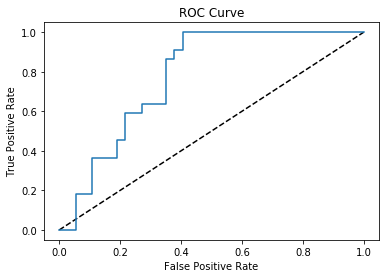

In [18]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [19]:
roc_auc_score(y_test, y_pred_prob)

0.7776412776412776

In [20]:
confusion_matrix(y_test,y_pred)

array([[33,  4],
       [17,  5]], dtype=int64)

In [21]:
logreg_unscaled = LogisticRegression().fit(X_train, y_train)
logreg_unscaled.score(X_test, y_test)

0.6610169491525424

<br>
## KNeighbors

In [22]:
steps = [('scaler', StandardScaler()),(('knn', KNeighborsClassifier()))]
pipeline = Pipeline(steps)

In [23]:
knn_scaled = pipeline.fit(X_train, y_train)

In [24]:
y_pred = pipeline.predict(X_test) 

In [25]:
accuracy_score(y_test, y_pred)

0.6949152542372882

In [26]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

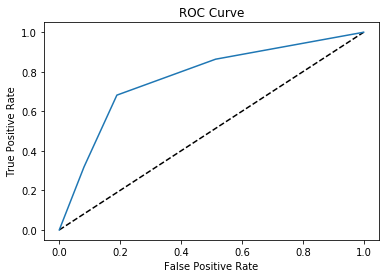

In [27]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [28]:
roc_auc_score(y_test, y_pred_prob)

0.770884520884521

In [29]:
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

In [30]:
knn_unscaled.score(X_test, y_test)

0.6440677966101694

In [31]:
confusion_matrix(y_test,y_pred)

array([[34,  3],
       [15,  7]], dtype=int64)

In [32]:
steps = [('scaler', StandardScaler()),(('knn', KNeighborsClassifier()))]
pipeline = Pipeline(steps)

In [33]:
parameters = {'knn__n_neighbors' : np.arange(1, 50)}
cv = GridSearchCV(pipeline, param_grid=parameters)

In [34]:
cv.fit(X, y);
#cv.fit(X_train, y_train);

In [35]:
y_pred = cv.predict(X_test)

In [36]:
print(cv.best_params_)

{'knn__n_neighbors': 16}


In [37]:
print(cv.score(X_test, y_test)) 

0.6610169491525424


In [38]:
y_pred_prob = cv.predict_proba(X_test)[:,1]

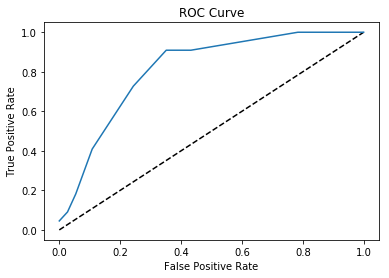

In [39]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [40]:
roc_auc_score(y_test, y_pred_prob)

0.8120393120393121

In [41]:
confusion_matrix(y_test,y_pred)

array([[35,  2],
       [18,  4]], dtype=int64)

In [42]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.66      0.95      0.78        37
          1       0.67      0.18      0.29        22

avg / total       0.66      0.66      0.59        59



<br>
## Neural Network - Scaled with StandardScaller

In [43]:
steps = [('scaler', StandardScaler()),(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=42, max_iter=500, warm_start=True)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [44]:
neural_scaled = pipeline.fit(X_train, y_train)

In [45]:
y_pred = pipeline.predict(X_test) 

In [46]:
accuracy_score(y_test, y_pred)

0.7457627118644068

In [47]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [48]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

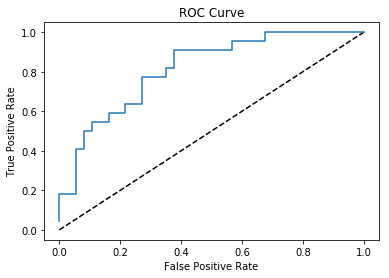

In [49]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [50]:
roc_auc_score(y_test, y_pred_prob)

0.8144963144963144

[[31  6]
 [ 9 13]]
Confusion matrix, without normalization


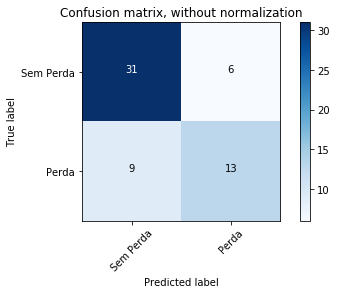

In [51]:
print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

In [52]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.78      0.84      0.81        37
          1       0.68      0.59      0.63        22

avg / total       0.74      0.75      0.74        59



In [53]:
cv_scores = cross_val_score(pipeline, X, y, cv=5)

In [54]:
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.75 0.58 0.5  0.76 0.74]
Average 5-Fold CV Score: 0.6652542372881356


<br>
## Neural Network - Scaled with MinMaxScaller

In [55]:
steps = [('scaler', MinMaxScaler()),(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=42, max_iter=1000, warm_start=True)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [56]:
#neural_scaled = pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('neural', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning_rate_init=...
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True))])

In [57]:
print(neural_scaled)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('neural', MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 32), learning_rate='constant',
       learning...
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=True))])


In [58]:
y_pred = pipeline.predict(X_train) 

In [59]:
accuracy_score(y_train, y_pred)

0.8974358974358975

In [60]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]

In [61]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

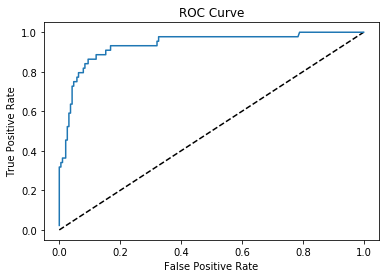

In [62]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [63]:
roc_auc_score(y_train, y_pred_prob)

0.935944976076555

[[182   8]
 [ 16  28]]
Confusion matrix, without normalization


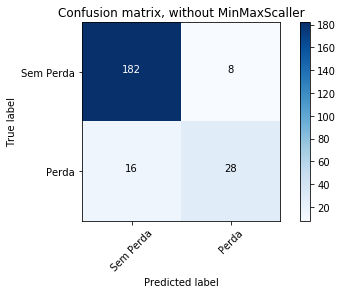

In [64]:
print(confusion_matrix(y_train,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without MinMaxScaller')

In [65]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.92      0.96      0.94       190
          1       0.78      0.64      0.70        44

avg / total       0.89      0.90      0.89       234



In [66]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(cv_scores)

[0.77 0.79 0.81 0.74 0.83]


In [67]:
10.0 ** -np.arange(1, 7)

array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])

In [68]:
rn = MLPClassifier(max_iter=1000, random_state=42)
parameters = {'solver': ['lbfgs','adam','sgd'], 'alpha': 10.0 ** -np.arange(1, 7),
             'hidden_layer_sizes': [x for x in itertools.product((10,20,30,40,50,100),repeat=2)]
             }
cv = GridSearchCV(rn, param_grid=parameters, verbose=3, n_jobs=-1)


In [69]:
#rf.fit(X_train, y_train);
cv.fit(X_train, y_train);

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 589 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 1093 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1538 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1944 out of 1944 | elapsed:  2.3min finished


In [70]:
print(cv.best_params_)

{'alpha': 1e-05, 'hidden_layer_sizes': (50, 100), 'solver': 'lbfgs'}


In [71]:
#y_pred = rf.predict(X_test)
y_pred = cv.predict(X_test)

In [72]:
final_model =cv.best_estimator_

In [73]:
final_model

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [74]:
steps = [('scaler', MinMaxScaler()),(('neural', MLPClassifier(activation='relu', alpha=1.8, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)))]
pipeline = Pipeline(steps)

In [75]:
#neural_scaled = pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('neural', MLPClassifier(activation='relu', alpha=1.8, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100), learning_rate='constant',
       learning_rate_init=0...      solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False))])

In [76]:
y_pred = pipeline.predict(X_train) 

In [77]:
accuracy_score(y_train, y_pred)

0.9529914529914529

In [78]:
y_pred_prob = pipeline.predict_proba(X_train)[:,1]

In [79]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

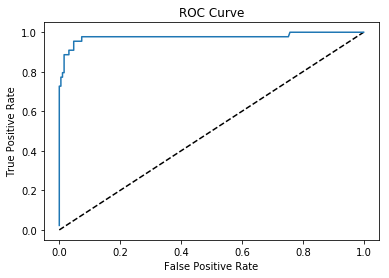

In [80]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [81]:
roc_auc_score(y_train, y_pred_prob)

0.9763755980861245

[[188   2]
 [  9  35]]
Confusion matrix, without normalization


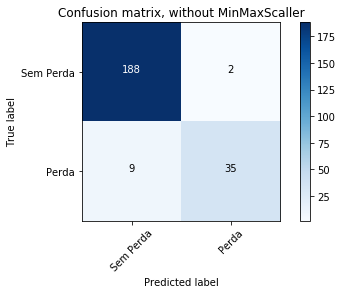

In [82]:
print(confusion_matrix(y_train,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without MinMaxScaller')

In [83]:
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       190
          1       0.95      0.80      0.86        44

avg / total       0.95      0.95      0.95       234



In [84]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print(cv_scores)

[0.85 0.7  0.81 0.77 0.83]


In [85]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_prob)

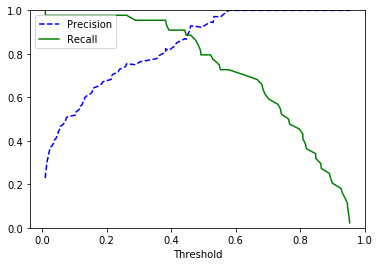

In [86]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [87]:
predict_mine = np.where(y_pred_prob > 0.52, 1, 0)

[[188   2]
 [  9  35]]
Confusion matrix, without normalization


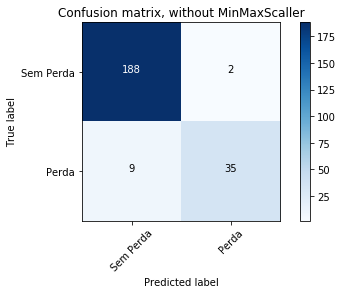

In [88]:
print(confusion_matrix(y_train,predict_mine))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, predict_mine)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without MinMaxScaller')

In [89]:
print(classification_report(y_train, predict_mine))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97       190
          1       0.95      0.80      0.86        44

avg / total       0.95      0.95      0.95       234



In [90]:
y_pred = pipeline.predict(X_test)

In [91]:
accuracy_score(y_test, y_pred)

0.7288135593220338

In [92]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [93]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

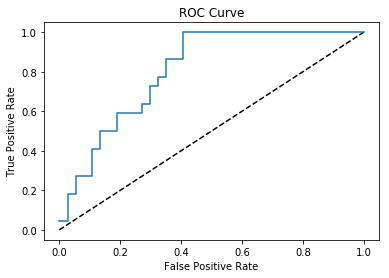

In [94]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [95]:
roc_auc_score(y_test, y_pred_prob)

0.8058968058968058

[[32  5]
 [11 11]]
Confusion matrix, without normalization


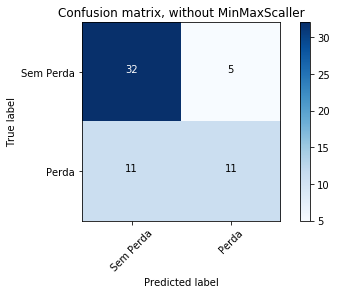

In [96]:
print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without MinMaxScaller')

In [97]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.86      0.80        37
          1       0.69      0.50      0.58        22

avg / total       0.72      0.73      0.72        59



In [98]:
predict_mine = np.where(y_pred_prob > 0.9, 1, 0)

[[36  1]
 [18  4]]
Confusion matrix, without normalization


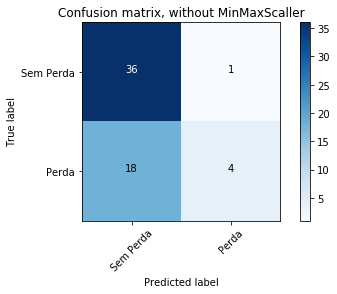

In [99]:
print(confusion_matrix(y_test,predict_mine))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predict_mine)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without MinMaxScaller')

In [100]:
print(classification_report(y_test, predict_mine))

             precision    recall  f1-score   support

          0       0.67      0.97      0.79        37
          1       0.80      0.18      0.30        22

avg / total       0.72      0.68      0.61        59



<br>
## RandomForest

In [101]:
steps = [('scaler', StandardScaler()),(('rf', RandomForestClassifier(n_estimators=200, max_features=8, max_depth=12)))]
pipeline = Pipeline(steps)

In [102]:
random_scaled = pipeline.fit(X_train, y_train)

In [103]:
y_pred = pipeline.predict(X_test) 
accuracy_score(y_test, y_pred)

0.7457627118644068

In [104]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

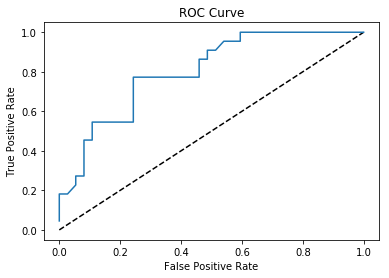

In [105]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [106]:
roc_auc_score(y_test, y_pred_prob)

0.8009828009828008

[[34  3]
 [12 10]]
Confusion matrix, without normalization


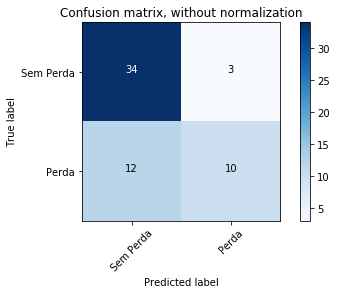

In [107]:
print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

Positive Predictive Value (PPV)
$$Precision=\frac{TP}{TP+FP}$$
<br>
Sensitivity, Hit Rate, True Positive Rate
$$Recall=\frac{TP}{TP+FN}$$
<br>
Harmonic mean between Precision and Recall
$$F1 Score=2 * \frac{Precision * Recall}{Precision + Recall}$$

In [108]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.92      0.82        37
          1       0.77      0.45      0.57        22

avg / total       0.75      0.75      0.73        59



In [109]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42)

In [110]:
parameters = {'n_estimators' : np.arange(500, 550),
             'min_samples_split': np.arange(2, 5),
             'max_features': ['auto', 'sqrt', 'log2'],
             'max_depth' : [4,5,6,7,8],
             'bootstrap': [True,False],
             'warm_start': [True,False],
             'criterion' :['gini', 'entropy']
             }
cv = GridSearchCV(rf, param_grid=parameters, verbose=3, n_jobs=-1, cv=5)
              #"max_depth": np.arange(1, 50),
              #"max_features": [1, 3, 10],
              
              #"min_samples_leaf": np.arange(1, 10),
              
              #"criterion": ["gini", "entropy"]

In [ ]:
#rf.fit(X_train, y_train);
cv.fit(X_train, y_train);

Fitting 5 folds for each of 18000 candidates, totalling 90000 fits


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed: 14.0min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed: 18.3min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed: 34.3min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed: 40.7min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed: 47.7min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed: 55.1min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | elapsed: 63.2min
[Parallel(n_jobs=-1)]: Done 8184 tasks      | elapsed: 71.8m

In [ ]:
print(cv.best_params_)

In [ ]:
final_model =cv.best_estimator_

In [ ]:
final_model

In [ ]:
y_pred = final_model.predict(X_train)


In [ ]:
y_pred_prob = final_model.predict_proba(X_train)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_train, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_train, y_pred_prob)

In [ ]:
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5)
print(cv_scores)

In [ ]:
#print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_train, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
y_pred = final_model.predict(X_test)


In [ ]:
y_pred_prob = final_model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred_prob)

In [ ]:
#print(confusion_matrix(y_test,y_pred))
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Sem Perda','Perda'],
                      title='Confusion matrix, without normalization')

In [ ]:
print(classification_report(y_test, y_pred))